In [5]:
# importar dependencias necesarias
import pandas as pd
 

In [6]:
# configurar para que pandas mustre todas las columnas del CSV
pd.set_option('display.max_columns', None)

In [7]:
ls data/

bank_transactions.csv  customer_segmentation.csv  german_credit_data.csv  tmp/


In [8]:
# Lectura de archivo CSV a DataFrame

bank_transactions = pd.read_csv("data/bank_transactions.csv")
customer_segmentation = pd.read_csv('data/customer_segmentation.csv')
german_credit = pd.read_csv('data/german_credit_data.csv')

In [9]:
 bank_transactions

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [6]:
# Cantidad de datos nulos en cada columna:

# CustomerDOB                3397    --- "Not Provided"
# CustGender                 1100    ---  datos revizados
# CustLocation                151    ---  Rellenar con información las comun // "no se provee"
# CustAccountBalance         2369    ---  rellenar con la media de todos los resultados

pd.DataFrame(bank_transactions.isna()).sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

<h1>Primera Alternativa -- Eliminar nulos</h1>

In [91]:


bk_alt1  =  bank_transactions[bank_transactions['CustomerDOB'].notnull()]



In [92]:
bk_alt1  =  bk_alt1[bank_transactions['CustGender'].notnull()]


/tmp/ipykernel_3215/483228585.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bk_alt1  =  bk_alt1[bank_transactions['CustGender'].notnull()]


In [93]:
bk_alt1  =  bk_alt1[bank_transactions['CustLocation'].notnull()]


/tmp/ipykernel_3215/3229804347.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bk_alt1  =  bk_alt1[bank_transactions['CustLocation'].notnull()]


In [94]:
bk_alt1  =  bk_alt1[bank_transactions['CustAccountBalance'].notnull()]

/tmp/ipykernel_3215/3443401997.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bk_alt1  =  bk_alt1[bank_transactions['CustAccountBalance'].notnull()]


In [95]:
# Se eliminan 6953 filas
bk_alt1


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [99]:
bk_alt1['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [100]:
# Corrección de valor mal ingresado para 'CustGender'  ||  Remplazar 'T' por 'M'


bk_alt1.loc[bk_alt1['CustGender']=='T', 'CustGender']='M'

bk_alt1['CustGender'].value_counts()


M    760979
F    280635
Name: CustGender, dtype: int64

In [101]:
# Data set Limpio!
# Se eliminan 6953 filas

bk_alt1.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

<h1>Segunda Alternativa -- Reparar información de los campos </h1>


In [10]:
bank_transactions.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [11]:
# CustomerDOB                3397    --- media de las fechas
# CustGender                 1100    --- male / female || Eliminar
# CustLocation                151    --- Rellenar con información las comun // "no se provee"
# CustAccountBalance         2369    --- media de todos los resultados

In [12]:
t = [e for e in range(1, 1048568)]
l = pd.DataFrame(t)
bt_index = bank_transactions.assign(INDEX=l)


<h3>Columna: CustomerDOB</h3>

In [13]:
# filas en donde la columna contiene campos nulos
bt_index

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),INDEX
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,1
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,2
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,3
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,4
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,5
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0,1048563
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0,1048564
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0,1048565
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,1048566


In [24]:
bk_alt2 = bt_index


In [25]:
# Se asigna el valor 'unknown' a la columna CustomerDOB donde existen valores nulos

bk_alt2['CustomerDOB'].fillna('unknown', inplace=True)


TransactionID                 0
CustomerID                    0
CustomerDOB                   0
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
INDEX                         0
dtype: int64

In [26]:
# Se asigna el valor 'unknown' a la columna CustGender donde existen valores nulos

bk_alt2['CustGender'].fillna('unknown', inplace=True)


TransactionID                 0
CustomerID                    0
CustomerDOB                   0
CustGender                    0
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
INDEX                         0
dtype: int64

In [27]:
# Se asigna el valor 'unknown' a la columna CustGender donde existen valores nulos

bk_alt2['CustLocation'].fillna('unknown', inplace=True)


TransactionID                 0
CustomerID                    0
CustomerDOB                   0
CustGender                    0
CustLocation                  0
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
INDEX                         0
dtype: int64

<AxesSubplot:xlabel='INDEX', ylabel='CustAccountBalance'>

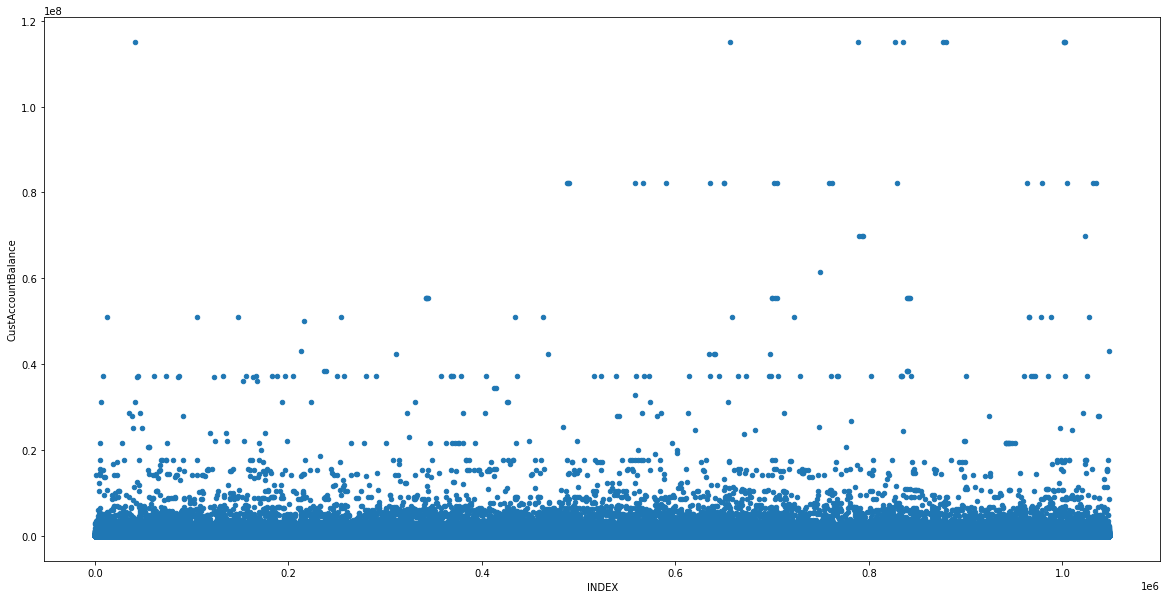

In [33]:
bk_alt2[['CustAccountBalance', 'INDEX']].plot(kind='scatter', x='INDEX', y='CustAccountBalance', figsize=(20, 10))

In [40]:
bk_alt2['CustAccountBalance'].mean()

115403.54005622261

In [41]:
bk_alt2['CustAccountBalance'].fillna(bk_alt2['CustAccountBalance'].mean(), inplace=True)


In [42]:
bk_alt2.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
INDEX                      0
dtype: int64

In [23]:


dates = pd.DataFrame(dates).assign(INDEX=l)

In [24]:
dates

,CustomerDOB,INDEX
0,1994-10-01,1
1,2057-04-04,2
2,1996-11-26,3
3,1973-09-14,4
4,1988-03-24,5
...,...,...
1048562,1990-08-04,1048563
1048563,1992-02-20,1048564
1048564,1989-05-18,1048565
1048565,1978-08-30,1048566


In [20]:
dates.describe(datetime_is_numeric=True)

count                          1045170
mean     1982-06-20 12:25:09.563420544
min                1800-01-01 00:00:00
25%                1983-01-20 00:00:00
50%                1988-06-22 00:00:00
75%                1992-03-10 00:00:00
max                2071-12-31 00:00:00
Name: CustomerDOB, dtype: object

<AxesSubplot:xlabel='INDEX', ylabel='CustomerDOB'>

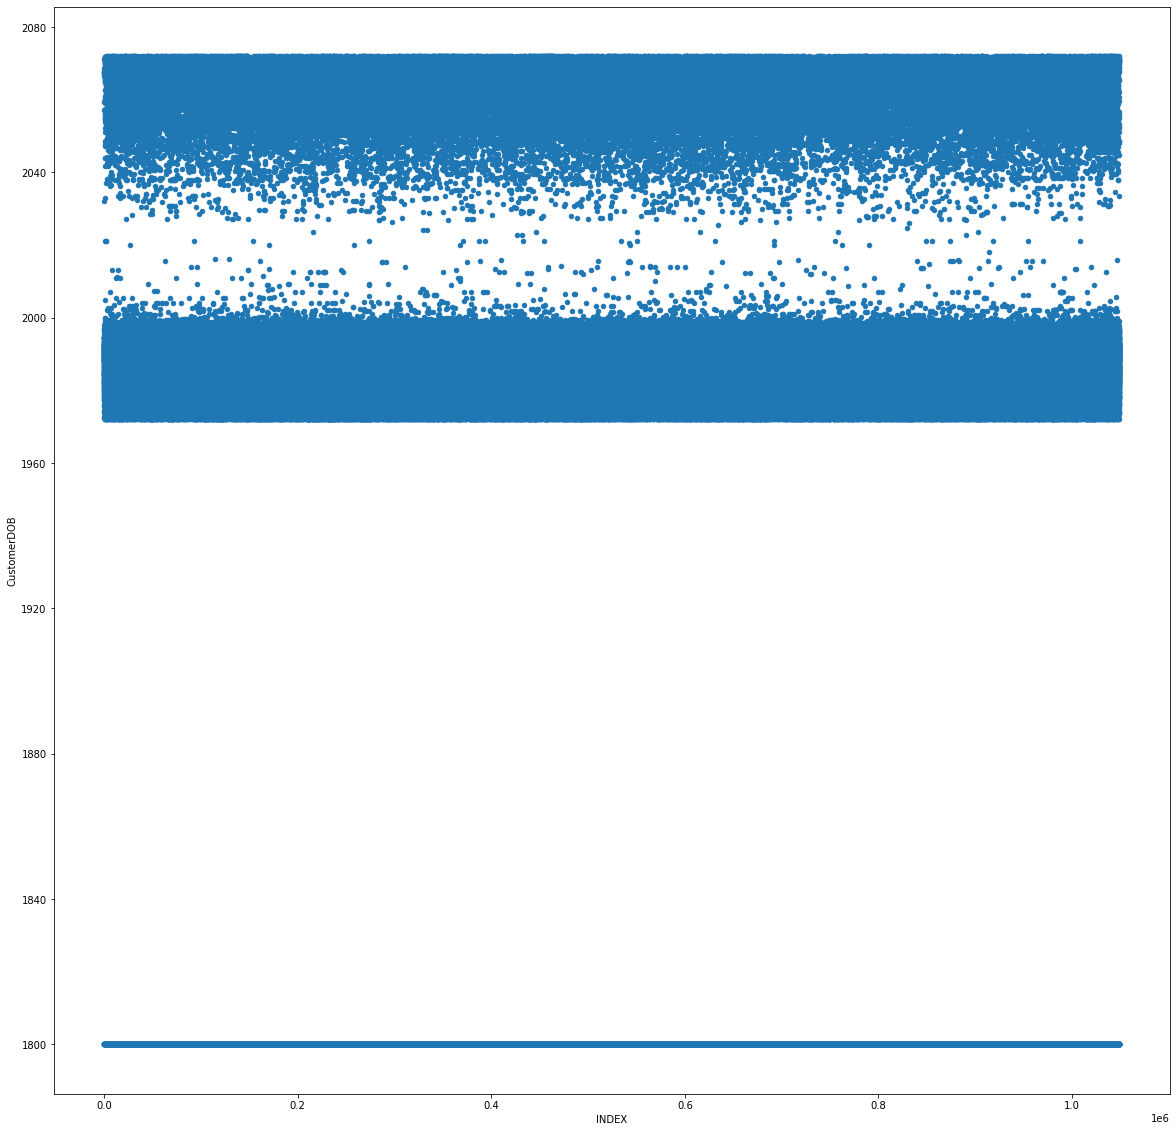

In [26]:
dates.plot(kind='scatter', x='INDEX', y='CustomerDOB', figsize=(20, 20))

In [30]:
dates.describe()

,INDEX
count,1.048567e+06
mean,5.242840e+05
std,3.026954e+05
min,1.000000e+00
25%,2.621425e+05
50%,5.242840e+05
75%,7.864255e+05
max,1.048567e+06


In [29]:
dates[dates['CustomerDOB']>'2022/05/09']

,CustomerDOB,INDEX
1,2057-04-04,2
15,2068-10-07,16
30,2067-01-21,31
51,2066-07-25,52
79,2067-05-25,80
...,...,...
1048506,2070-09-20,1048507
1048510,2048-07-15,1048511
1048536,2033-05-10,1048537
1048544,2071-05-10,1048545


In [18]:
# describir el caracteristicas propias de los campos numericos del Dataframe
bank_transactions.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [11]:
bank_transactions[['CustAccountBalance']]

,CustAccountBalance
0,17819.05
1,2270.69
2,17874.44
3,866503.21
4,6714.43
...,...
1048562,7635.19
1048563,27311.42
1048564,221757.06
1048565,10117.87


In [19]:
# tipos de dato de las columnas
bank_transactions.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

array([[<AxesSubplot:title={'center':'CustAccountBalance'}>,
        <AxesSubplot:title={'center':'TransactionTime'}>],
       [<AxesSubplot:title={'center':'TransactionAmount (INR)'}>,
        <AxesSubplot:>]], dtype=object)

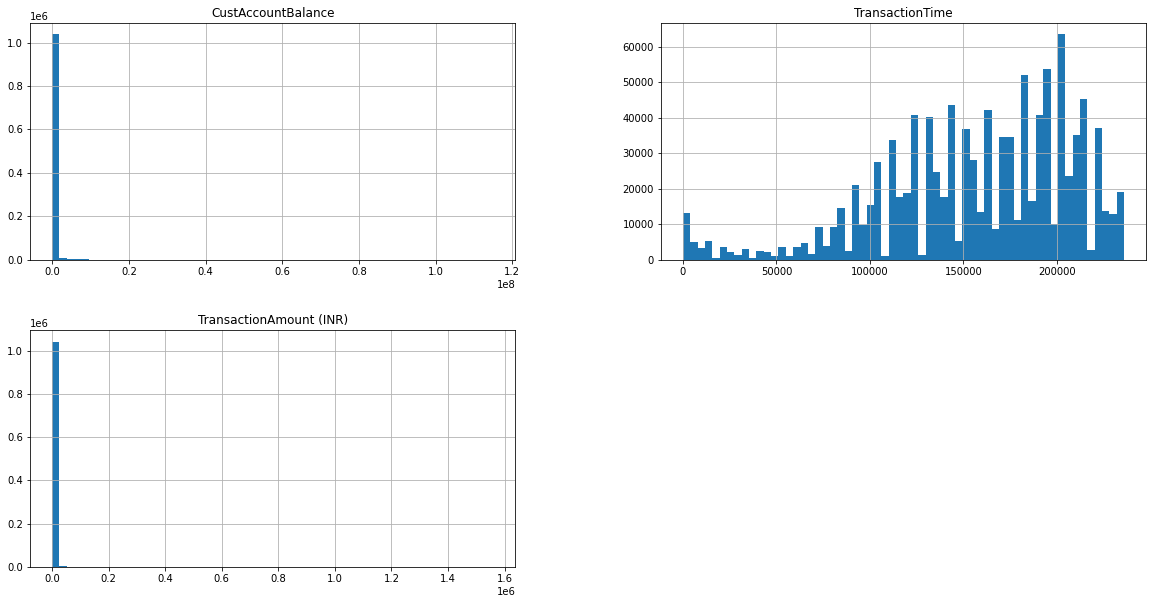

In [20]:
bank_transactions.hist(bins=60, figsize=(20, 10))

In [21]:
# bank_transactions[bank_transactions['CustAccountBalance']<1_000_000]
# bank_transactions

In [22]:
# GENERACIÓN DE UN INDEX PARA GENERACIÓN DE GRÁFICAS

In [23]:
t = [e for e in range(1, 1048568)]
l = pd.DataFrame(t)
bt_index = bank_transactions.assign(INDEX=l)


In [24]:
bt_index = bank_transactions.assign(INDEX=l)
# bt_index

<AxesSubplot:xlabel='INDEX', ylabel='CustAccountBalance'>

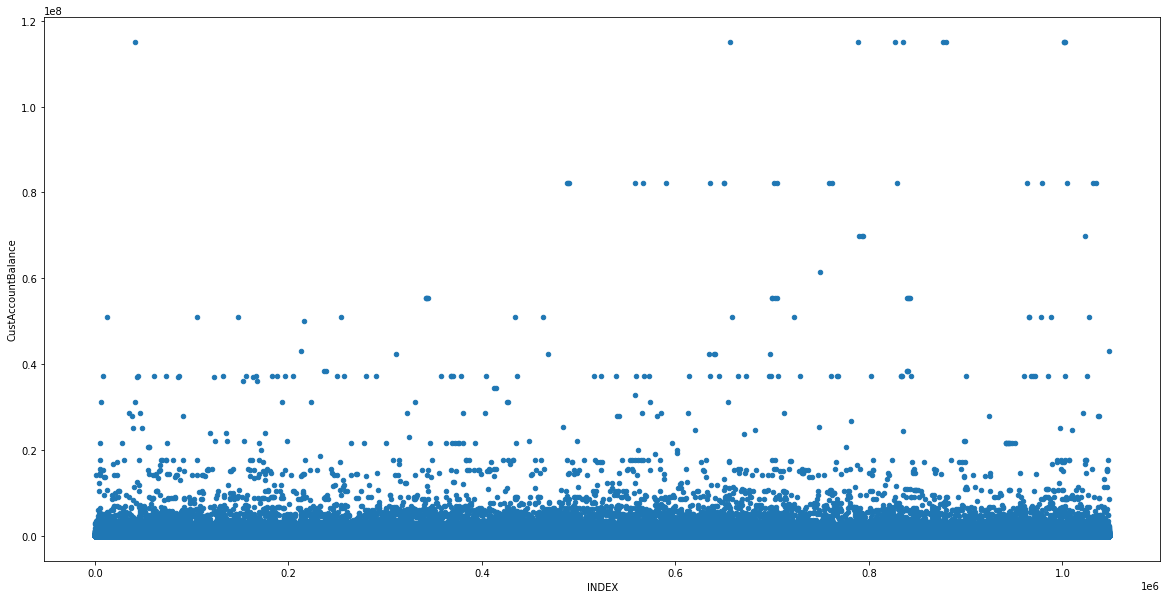

In [25]:
bt_index[['INDEX','CustAccountBalance']].plot(kind='scatter', x='INDEX', y='CustAccountBalance', figsize=(20, 10))

In [21]:
bank_transactions

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


array([[<AxesSubplot:title={'center':'CustAccountBalance'}>,
        <AxesSubplot:title={'center':'TransactionTime'}>],
       [<AxesSubplot:title={'center':'TransactionAmount (INR)'}>,
        <AxesSubplot:>]], dtype=object)

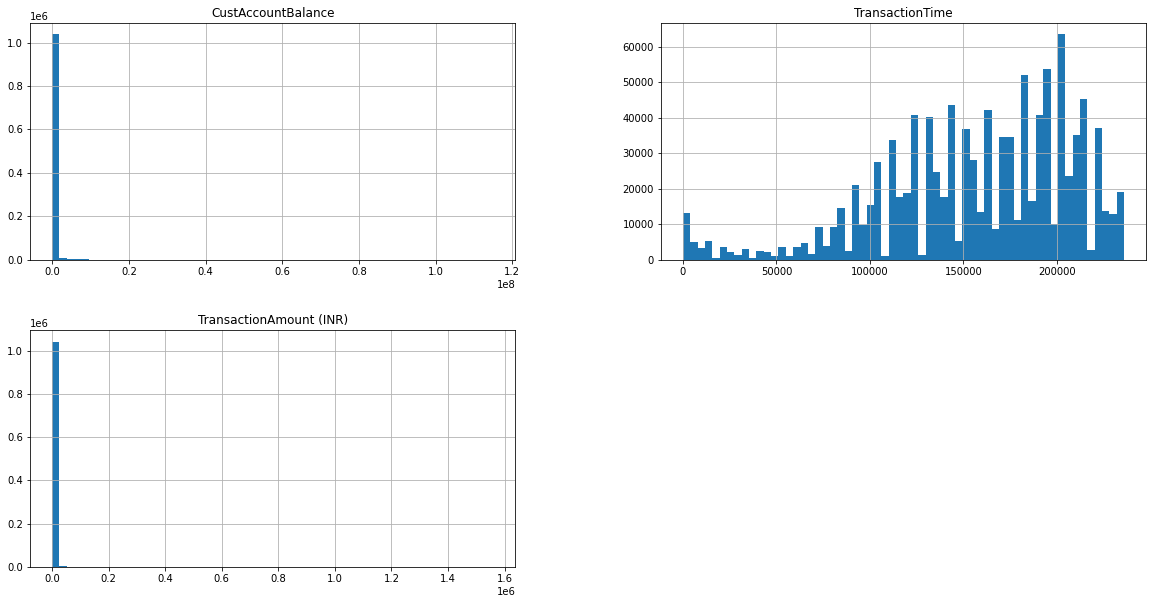

In [22]:
# Mostrar gráficas
#     x = margen de datos
#     y = cantidad de datos
# ej: en la primera grafica la mayoria de transacciones estan en menos de 1_000_000


bank_transactions.hist(bins=60, figsize=(20, 10))

In [23]:
# COLUMNAS: PROCESO PARA LA COLUMNA __ TrasactionAmount __

# numero de transacciones donde 'TransactionAmount' es menor a 100_000
bank_transactions[bank_transactions['TransactionAmount (INR)']<100_000].count()

TransactionID              1047638
CustomerID                 1047638
CustomerDOB                1044248
CustGender                 1046538
CustLocation               1047487
CustAccountBalance         1045273
TransactionDate            1047638
TransactionTime            1047638
TransactionAmount (INR)    1047638
dtype: int64

<AxesSubplot:xlabel='INDEX', ylabel='TransactionAmount (INR)'>

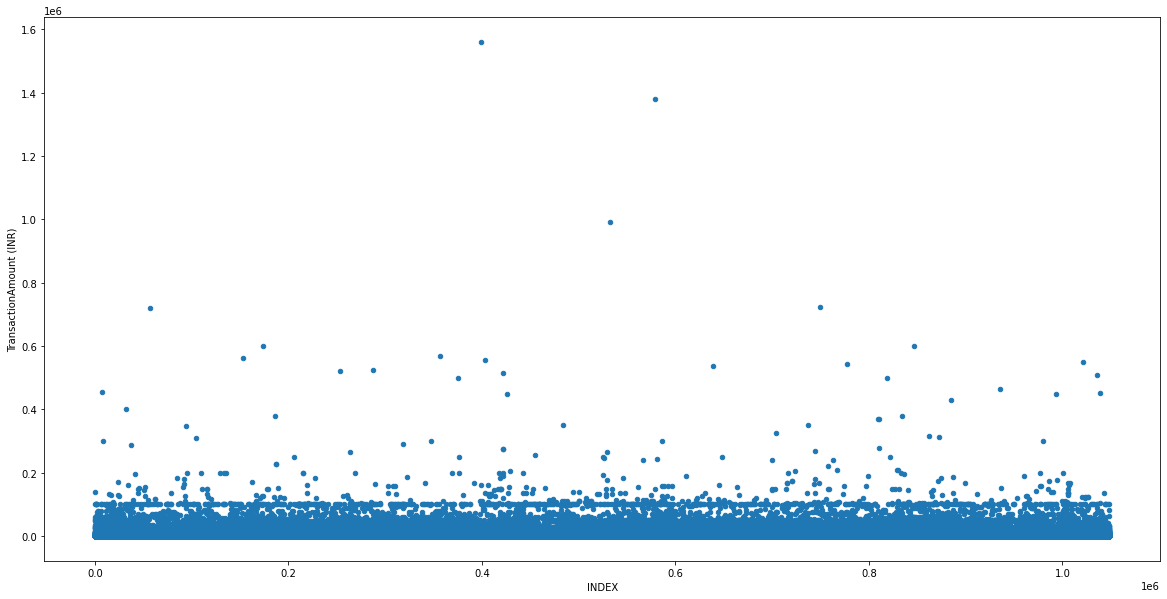

In [26]:

bt_index[['INDEX','TransactionAmount (INR)']].plot(kind='scatter', x='INDEX', y='TransactionAmount (INR)', figsize=(20, 10))

In [27]:
# los datos no se eliminaran

In [28]:
bt_index.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'INDEX'],
      dtype='object')

In [29]:
bt_index['CustGender'].value_counts()

M    765530
F    281936
T         1
Name: CustGender, dtype: int64

In [30]:
# CustomerDOB (Eliminar)

# bt_index['CustomerDOB'].value_counts()

In [50]:
bt_index[bt_index['CustLocation'].isna()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),INDEX
2256,T2257,C7383573,1/11/90,M,NaN,262645.74,21/10/16,204113,96.00,2257
31269,T31270,C1433534,9/3/73,M,NaN,2780.38,26/9/16,124526,75.00,31270
35568,T35569,C2737330,10/12/86,M,NaN,17000.79,26/9/16,190506,99.00,35569
41588,T41589,C5833553,9/3/73,M,NaN,2780.38,3/8/16,92755,90.00,41589
42840,T42841,C7233515,9/3/73,M,NaN,2780.38,3/8/16,93120,14.00,42841
...,...,...,...,...,...,...,...,...,...,...
998657,T998658,C4514385,17/8/80,M,NaN,16426.68,14/9/16,85202,1900.00,998658
1008646,T1008647,C7210667,14/4/81,M,NaN,345829.09,14/9/16,213230,2046.00,1008647
1034147,T1034148,C5933513,9/3/73,M,NaN,2780.38,18/9/16,180334,25000.00,1034148
1035525,T1035526,C4672357,28/5/82,M,NaN,299489.63,18/9/16,155141,729.72,1035526


In [ ]:
# Se pierden 1100 datos de esta columna

In [26]:
# customer_segmentation
customer_segmentation

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [42]:
customer_segmentation[customer_segmentation['Defaulted'].isna()]

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
5,5,6,40,1,23,81,0.998,7.831,NaN,10.9
8,8,9,26,1,5,18,0.575,2.215,NaN,15.5
11,11,12,34,2,9,40,0.374,0.266,NaN,1.6
13,13,14,46,1,6,30,1.415,3.865,NaN,17.6
15,15,16,24,1,1,16,0.185,1.287,NaN,9.2
...,...,...,...,...,...,...,...,...,...,...
818,818,819,35,2,0,35,2.383,1.957,NaN,12.4
820,820,821,37,1,4,24,0.419,2.989,NaN,14.2
825,825,826,32,2,12,116,4.027,2.585,NaN,5.7
835,835,836,21,3,0,41,2.367,5.628,NaN,19.5


In [45]:
customer_segmentation.dtypes


Unnamed: 0           int64
Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Customer Id'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Edu'}>,
        <AxesSubplot:title={'center':'Years Employed'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Card Debt'}>,
        <AxesSubplot:title={'center':'Other Debt'}>,
        <AxesSubplot:title={'center':'Defaulted'}>],
       [<AxesSubplot:title={'center':'DebtIncomeRatio'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

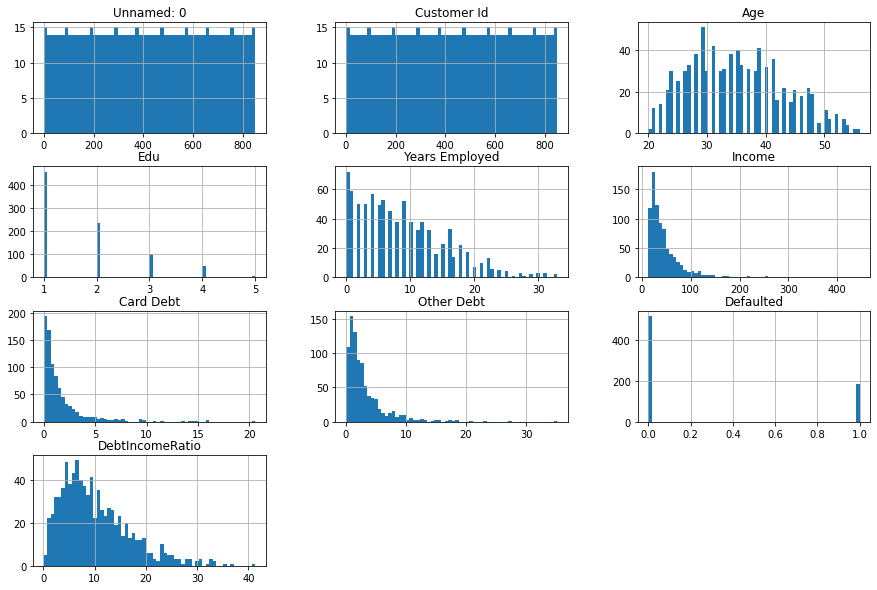

In [47]:
customer_segmentation.hist(bins=60, figsize=(15, 10))

In [48]:
customer_segmentation.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [50]:
# german_credit

In [51]:
german_credit

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [52]:
german_credit.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [53]:
german_credit.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [59]:
german_credit[german_credit['Checking account'].isna()]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
2,2,49,male,1,own,little,NaN,2096,12,education
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
16,16,53,male,2,own,NaN,NaN,2424,24,radio/TV
...,...,...,...,...,...,...,...,...,...,...
990,990,37,male,1,own,NaN,NaN,3565,12,education
991,991,34,male,1,own,moderate,NaN,1569,15,radio/TV
994,994,50,male,2,own,NaN,NaN,2390,12,car
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment


In [55]:
german_credit.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Job'}>,
        <AxesSubplot:title={'center':'Credit amount'}>],
       [<AxesSubplot:title={'center':'Duration'}>, <AxesSubplot:>]],
      dtype=object)

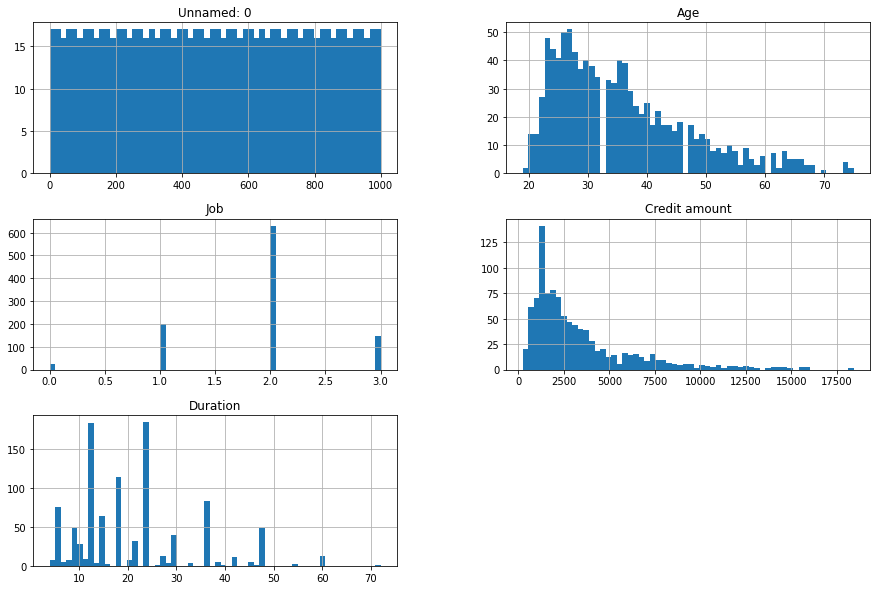

In [56]:
german_credit.hist(bins=60, figsize=(15, 10))